In [19]:
# Main imports
import pandas as pd           # For data manipulation and reading tabular files
import networkx as nx         # For building and analyzing graphs
import matplotlib.pyplot as plt  # For plotting graphs
import numpy as np            # For numerical operations
import os
import seaborn as sns

In [4]:
# Optional configurations
plt.style.use("ggplot")       # Sets the plot style to 'ggplot' for better aesthetics

# Paths to the input files
nodes_file = "/content/1A3N.cif_ringNodes"
edges_file = "/content/1A3N.cif_ringEdges"

# Load data into DataFrames
df_nodes = pd.read_csv(nodes_file, sep="\t")  # Reads the node table using tab as separator
df_edges = pd.read_csv(edges_file, sep="\t")  # Reads the edge table using tab as separator

# Preview the node data
print("Nodes:")
print(df_nodes.head().to_string())  # Shows the first few rows of the node DataFrame

# Preview the edge data
print("Edges:")
print(df_edges.head().to_string())  # Shows the first few rows of the edge DataFrame

Nodes:
      NodeId Chain  Position Residue Type Dssp  Degree  Bfactor_CA       x       y      z         pdbFileName  Model
0  A:1:_:VAL     A         1     VAL  RES            1       24.26  10.228  20.761  6.807  input_file.cif#1.A      1
1  A:2:_:LEU     A         2     LEU  RES            2       17.31   6.624  21.451  7.763  input_file.cif#2.A      1
2  A:3:_:SER     A         3     SER  RES            5       16.59   4.831  23.237  4.928  input_file.cif#3.A      1
3  A:4:_:PRO     A         4     PRO  RES    H       2       15.47   2.252  25.966  5.311  input_file.cif#4.A      1
4  A:5:_:ALA     A         5     ALA  RES    H       2       11.09  -0.457  23.367  4.513  input_file.cif#5.A      1
Edges:
     NodeId1  Interaction      NodeId2  Distance    Angle Atom1 Atom2        Donor Positive Cation Orientation  Model
0  A:1:_:VAL  HBOND:MC_SC  A:127:_:LYS     2.867  146.345     O    NZ  A:127:_:LYS      NaN    NaN         NaN      1
1  A:2:_:LEU    VDW:SC_SC  A:128:_:PHE     2.379

In [5]:
# Initialize as a MultiDiGraph to support multiple directed edges between the same pair of nodes
# G = nx.MultiDiGraph()

# Use MultiGraph() instead of MultiDiGraph() if directionality is not important.
# This allows multiple undirected edges between the same node pairs, useful for modeling
# symmetric or bidirectional interactions like Van der Waals forces.
G = nx.MultiGraph()

# Add all nodes with their attributes
for _, row in df_nodes.iterrows():
    node_id = row["NodeId"]                      # Extract the node identifier
    attributes = row.drop("NodeId").to_dict()    # Convert the remaining columns to a dictionary of attributes
    G.add_node(node_id, **attributes)            # Add the node and its attributes to the graph

print(f"Graph created with {G.number_of_nodes()} nodes.")

Graph created with 576 nodes.


In [8]:
degrees = [degree for _, degree in G.degree()]
print(degrees)

[1, 2, 5, 2, 2, 8, 4, 4, 4, 4, 2, 3, 3, 4, 1, 3, 4, 2, 0, 7, 3, 2, 2, 7, 3, 4, 6, 6, 6, 6, 12, 5, 3, 3, 4, 3, 2, 2, 4, 7, 2, 3, 9, 0, 1, 3, 2, 1, 2, 3, 0, 6, 1, 2, 2, 4, 3, 5, 5, 4, 2, 3, 4, 3, 3, 5, 6, 2, 3, 3, 2, 4, 1, 2, 3, 3, 1, 1, 2, 3, 5, 1, 3, 3, 2, 5, 5, 3, 1, 2, 3, 7, 4, 5, 2, 2, 9, 8, 3, 4, 6, 6, 6, 6, 9, 2, 3, 3, 6, 2, 3, 6, 4, 1, 0, 1, 5, 3, 1, 1, 4, 7, 5, 6, 2, 5, 9, 6, 2, 2, 6, 3, 4, 5, 3, 3, 7, 2, 1, 9, 8, 13, 1, 3, 4, 1, 1, 9, 5, 3, 3, 6, 3, 2, 3, 9, 2, 6, 3, 4, 2, 2, 4, 3, 5, 2, 5, 2, 3, 3, 8, 6, 3, 1, 5, 4, 2, 6, 3, 4, 3, 6, 8, 1, 0, 7, 0, 1, 1, 0, 5, 1, 1, 5, 5, 1, 1, 9, 1, 1, 4, 3, 2, 9, 3, 4, 6, 4, 5, 3, 6, 5, 5, 5, 4, 3, 1, 3, 0, 2, 2, 4, 0, 0, 2, 3, 1, 1, 1, 6, 3, 4, 7, 4, 3, 2, 3, 4, 4, 6, 4, 3, 7, 6, 6, 3, 2, 3, 3, 5, 2, 3, 3, 3, 2, 4, 3, 2, 2, 3, 0, 3, 6, 2, 3, 2, 2, 8, 3, 4, 6, 8, 6, 6, 3, 3, 4, 2, 2, 4, 2, 4, 3, 1, 2, 6, 2, 15, 2, 2, 6, 2, 2, 9, 7, 2, 5, 4, 2, 2, 3, 9, 2, 2, 7, 3, 0, 8, 3, 2, 3, 10, 3, 5, 5, 2, 6, 7, 9, 6, 4, 1, 3, 7, 2, 2, 4, 4, 3, 5, 11, 0

In [9]:
# Converter para Series e contar ocorrências
degree_series = pd.Series(degrees)
pdf = degree_series.value_counts(normalize=True).sort_index()  # PDF: frequência relativa


In [20]:
pdf

,proportion
0,0.038194
1,0.109375
2,0.185764
3,0.213542
4,0.159722
5,0.097222
6,0.090278
7,0.032986
8,0.029514
9,0.027778


In [11]:
cdf = pdf.cumsum()

In [12]:
cdf

,proportion
0,0.038194
1,0.147569
2,0.333333
3,0.546875
4,0.706597
5,0.803819
6,0.894097
7,0.927083
8,0.956597
9,0.984375


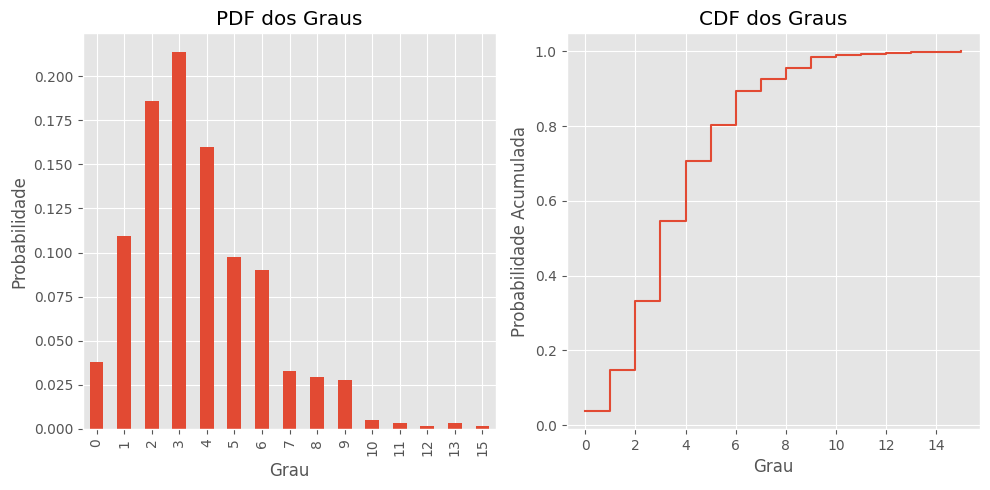

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
pdf.plot(kind="bar")
plt.title("PDF dos Graus")
plt.xlabel("Grau")
plt.ylabel("Probabilidade")

plt.subplot(1, 2, 2)
cdf.plot(drawstyle="steps-post")
plt.title("CDF dos Graus")
plt.xlabel("Grau")
plt.ylabel("Probabilidade Acumulada")

plt.tight_layout()
plt.show()

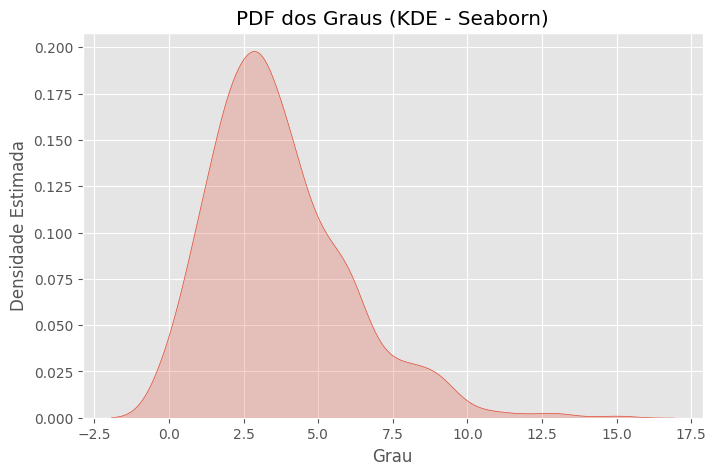

In [16]:
# Obter os graus dos nós
degrees = [d for _, d in G.degree()]
degree_series = pd.Series(degrees, name="degree")

# Plotar o KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(degree_series, bw_adjust=1, fill=True)  # bw_adjust ajusta a suavização
plt.title("PDF dos Graus (KDE - Seaborn)")
plt.xlabel("Grau")
plt.ylabel("Densidade Estimada")
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

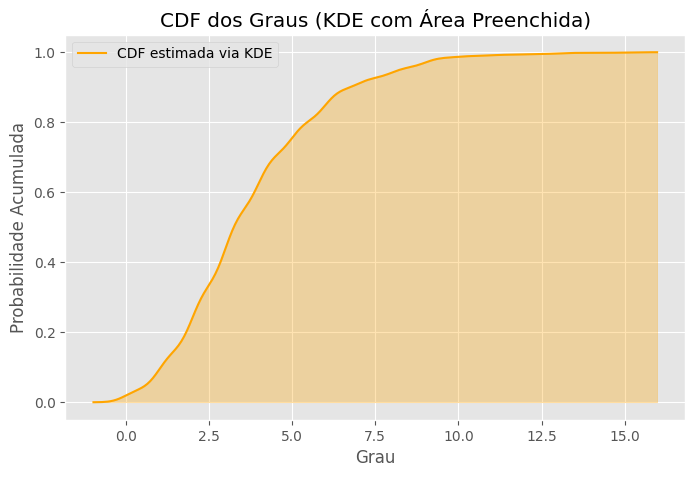

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import cumulative_trapezoid

# Obter os graus dos nós
degrees = [d for _, d in G.degree()]
degree_series = pd.Series(degrees, name="degree")

# Estimar a PDF com KDE usando seaborn
kde = sns.kdeplot(degree_series, bw_adjust=0.5)
x_vals = kde.lines[0].get_xdata()
y_vals = kde.lines[0].get_ydata()
plt.clf()  # limpa o plot para evitar sobreposição

# Integrar a PDF para obter a CDF
cdf_vals = cumulative_trapezoid(y_vals, x_vals, initial=0)
cdf_vals /= cdf_vals[-1]  # normalizar para ir de 0 a 1

# Plotar a CDF com preenchimento
plt.figure(figsize=(8, 5))
plt.plot(x_vals, cdf_vals, color="orange", label="CDF estimada via KDE")
plt.fill_between(x_vals, cdf_vals, color="orange", alpha=0.3)  # pinta a área sob a curva
plt.title("CDF dos Graus (KDE com Área Preenchida)")
plt.xlabel("Grau")
plt.ylabel("Probabilidade Acumulada")
plt.grid(True)
plt.legend()
plt.show()


In [22]:
G_simple = nx.Graph(G)  # converte MultiGraph para Graph

In [24]:
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple)
eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=1000, tol=1e-06)

In [26]:
centrality_df = pd.DataFrame({
    "degree": degree_centrality,
    "closeness": closeness_centrality,
    "betweenness": betweenness_centrality,
    "eigenvector": eigenvector_centrality
})

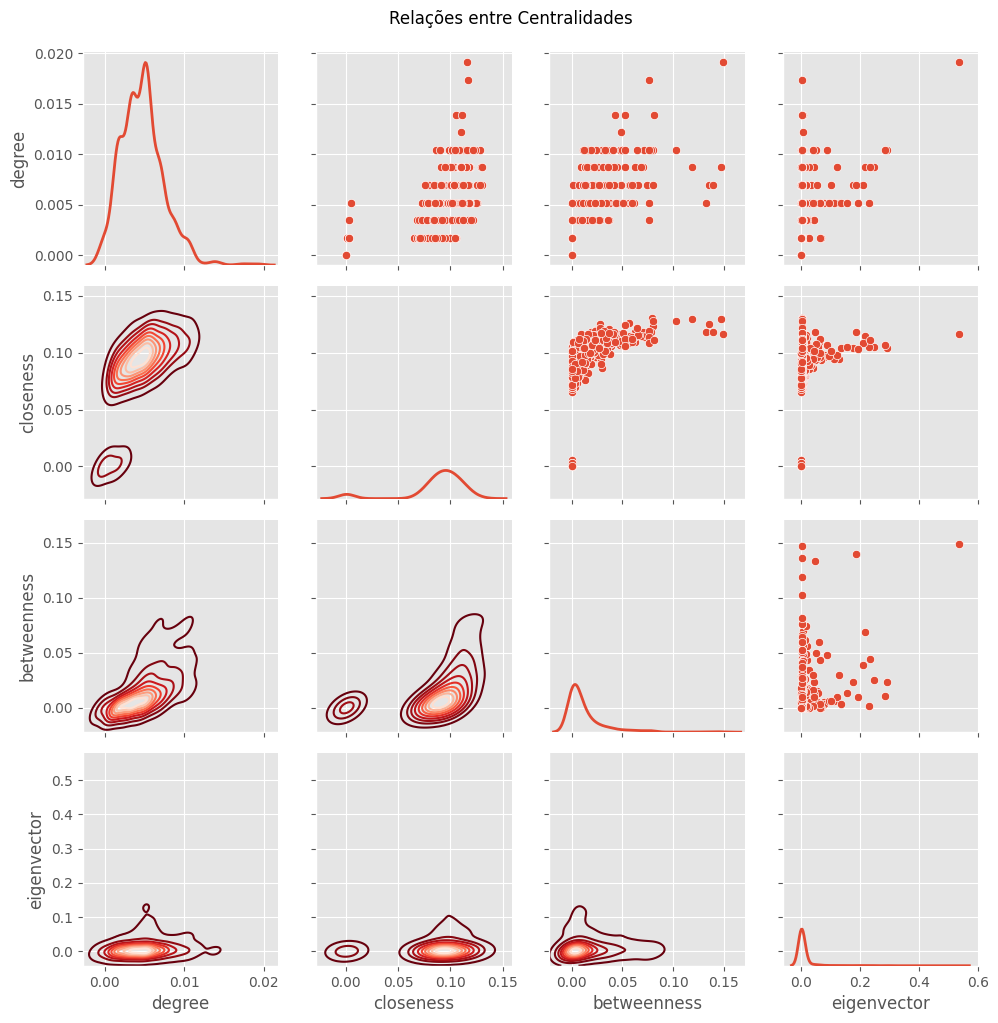

In [33]:
fig = sns.PairGrid(centrality_df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.suptitle("Relações entre Centralidades", y=1.02)
plt.show()